In [104]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [21]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [22]:
# Save the input and target variables

print(diabetes_dataset.keys())
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [23]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()
print(targets)

[-1.47194752e-02 -1.00165882e+00 -1.44579915e-01  6.99512942e-01
 -2.22496178e-01 -7.15965848e-01 -1.83538046e-01 -1.15749134e+00
 -5.47147277e-01  2.05006151e+00 -6.64021672e-01 -1.07957508e+00
  3.48889755e-01  4.26806019e-01 -4.43258925e-01  2.45001404e-01
  1.80071184e-01 -1.05621783e-01 -7.15965848e-01  2.06043272e-01
 -1.09256112e+00 -1.33929596e+00 -1.09256112e+00  1.20596866e+00
  4.13819975e-01  6.47568766e-01 -1.96524090e-01 -8.71798376e-01
 -2.74440354e-01  1.69943833e+00 -3.00412442e-01 -1.20943552e+00
  2.45262887e+00 -8.45826288e-01 -1.13151925e+00 -6.51035629e-01
  1.46568953e+00  1.60853602e+00  1.29687096e+00 -8.06868156e-01
 -6.77007716e-01 -1.26137969e+00 -1.18346343e+00 -7.80896068e-01
  1.38777327e+00 -1.28735178e+00  4.91736239e-01 -1.31593871e-01
 -1.00165882e+00 -1.31593871e-01  3.72247006e-02  9.46247777e-01
 -1.20943552e+00 -6.25063541e-01  3.87847887e-01 -3.13398486e-01
 -1.30033783e+00 -1.49512849e+00  2.32015360e-01  2.32015360e-01
 -1.18346343e+00 -1.05621

In [24]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)
print(train_data.shape)
print(test_data.shape)

(397, 10)
(45, 10)


#### Train a feedforward neural network model

In [78]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def get_model():
    model = Sequential([
            Dense(128, activation='relu', input_shape=(train_data.shape[1], )),
            Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.005)),
            Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.005)),
            Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.005)),
            Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.005)),
            Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.005)),
            Dense(1)
    ])
    return model
model = get_model()

In [48]:
# Print the model summary

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_46 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_47 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                

In [49]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [50]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=10, validation_split=0.15, batch_size=64, verbose=False)

In [51]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)


45/1 - 0s - loss: 1.8840 - mae: 0.5474


[1.7904746373494467, 0.5473604]

#### Plot the learning curves

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

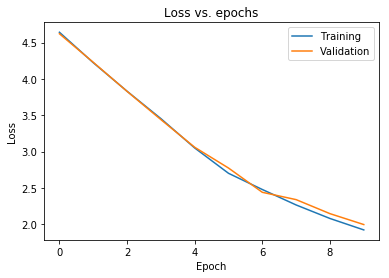

In [53]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [54]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [60]:
def get_regularised_model(wd, rate):
    model = Sequential([
            Dense(128, activation='relu', input_shape=(train_data.shape[1], )),
            Dropout(rate),
            Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
            Dropout(rate),
            Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
            Dropout(rate),
            Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
            Dropout(rate),
            Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
            Dropout(rate),
            Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
            Dropout(rate),
            Dense(1)
    ])
    return model


In [61]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5, 0.3)

In [62]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [64]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=10, validation_split=0.15, batch_size=64, verbose=False)

In [65]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets)

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5724714756011963, 0.6311754]

#### Plot the learning curves

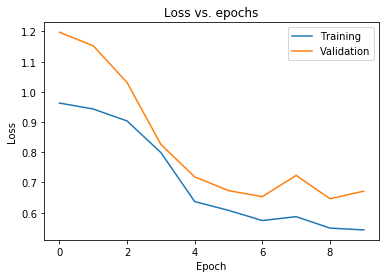

In [66]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [76]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback
class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Start training...")
    def on_train_end(self, logs=None):
        print("End training...")
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Start epoch {epoch}")
    def on_batch_begin(self, batch, logs=None):
        print(f"Start batch {batch}")
    def on_batch_end(self, batch, logs=None):
        print(f"Finish batch {batch}")
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch end")
        
class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Start predicting...")
    def on_predict_end(self, logs=None):
        print("End predicting...")
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Start epoch {epoch}")
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Start predicting batch {batch}")
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Finish predicting batch {batch}")
    def on_epoch_end(self, epoch, logs=None):
        print(f"End epoch {epoch}")
        print(f"End epoch {epoch}")  

In [70]:
# Re-build the model
model = get_regularised_model(1e-5, 0.3)


In [71]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


#### Train the model with the callback

In [72]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Start training...
Start epoch 0
Start batch 0
Finish batch 0
Start batch 1
Finish batch 1
Start batch 2
Finish batch 2
Start batch 3
Finish batch 3
End epoch 0
Start epoch 1
Start batch 0
Finish batch 0
Start batch 1
Finish batch 1
Start batch 2
Finish batch 2
Start batch 3
Finish batch 3
End epoch 1
Start epoch 2
Start batch 0
Finish batch 0
Start batch 1
Finish batch 1
Start batch 2
Finish batch 2
Start batch 3
Finish batch 3
End epoch 2
End training...


In [73]:
# Evaluate the model

model.evaluate(test_data, test_targets)

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9464769654803806, 0.8131305]

In [77]:
# Make predictions with the model

model.predict(test_data, callbacks=[PredictionCallback()])

Start predicting...
Start predicting batch 0
Finish predicting batch 0
Start predicting batch 1
Finish predicting batch 1
End predicting...


array([[-0.05661485],
       [-0.05295935],
       [ 0.20102367],
       [-0.06475326],
       [ 0.05054765],
       [-0.02083673],
       [-0.0660807 ],
       [-0.04404832],
       [-0.0648828 ],
       [-0.024659  ],
       [ 0.13807884],
       [-0.05473553],
       [ 0.10679278],
       [ 0.10484757],
       [ 0.05784232],
       [ 0.15334237],
       [-0.06067154],
       [-0.00688307],
       [ 0.02750028],
       [ 0.05917962],
       [ 0.06639694],
       [ 0.07987309],
       [-0.04840707],
       [ 0.07589331],
       [ 0.1982075 ],
       [-0.0198473 ],
       [ 0.10258286],
       [ 0.06254841],
       [-0.05197632],
       [ 0.01066675],
       [-0.06277058],
       [ 0.12005664],
       [ 0.10907739],
       [-0.03361278],
       [-0.06954905],
       [-0.0022942 ],
       [-0.04950288],
       [ 0.1339329 ],
       [ 0.1725927 ],
       [-0.00499761],
       [-0.02640822],
       [ 0.08262998],
       [-0.02109296],
       [-0.02408391],
       [ 0.12521075]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [99]:
# Re-train the unregularised model

unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', loss='mse')
unregularised_history = unregularised_model.fit(
    train_data, 
    train_targets, 
    epochs=100, 
    validation_split=0.15, 
    batch_size=64, 
    verbose=False, 
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [100]:
# Evaluate the model on the test set

unregularised_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.8062


0.6910366071595087

In [101]:
# Re-train the regularised model
regularised_model = get_regularised_model(1e-8, 0.3)
regularised_model.compile(optimizer='adam', loss='mse')
regularised_history = regularised_model.fit(
    train_data, train_targets, 
    epochs=100, validation_split=0.15, 
    batch_size=64, verbose=False, 
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [102]:
# Evaluate the model on the test set

regularised_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.6734


0.5539136674669054

#### Plot the learning curves

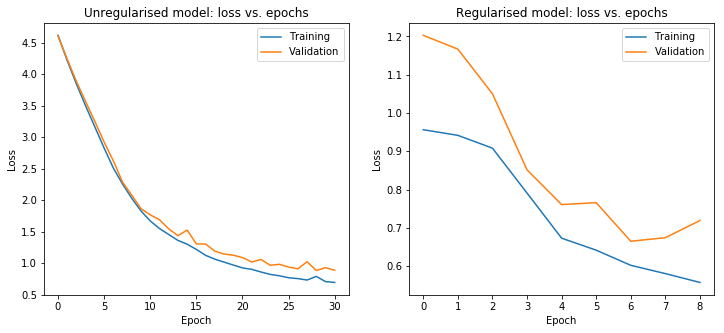

In [103]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unregularised_history.history['loss'])
plt.plot(unregularised_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(regularised_history.history['loss'])
plt.plot(regularised_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()